# FVGP Single Task Notebook
In this notebook we will go through many features of FVGP. We will be primarily concerned with regression over a single dimension output and single task. See the multiple_task_test_notebook.ipynb for single dimension and multiple task example.

## Import fvgp and relevant libraries

In [5]:
import fvgp
from fvgp import gp
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Defining some input data and testing points

In [74]:
def test_data_function(x):
    return 100*np.sin(x)+np.cos(x)

In [91]:
x_input = np.linspace(-2*np.pi, 10*np.pi,1000)

In [92]:
y_output = test_data_function(x_input)

In [93]:
x_input_test = np.linspace(3*np.pi, 4*np.pi, 100)

## Setting up the fvgp single task object
NOTE: The input and output data need to be # in the form (N x input_space_dim) and (N x output_tasks) where N is the number of examples. See help(gp.GP) for more information.

In [94]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape))

## Training our gaussian process regression on given data


In [95]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  1000  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  47221.74561913669
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.1
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= 2500.9
differential_evolution step 2: f(x)= 2495.62
differential_evolution step 3: f(x)= 2438.47
differential_evolution step 4: f(x)= 2418.35
differential_evolution step 5: f(x)= 2413.36
differential_evolution step 6: f(x)= 2410.42
differential_evolution step 7: f(x)= 2409.17
differential_evolution step 8: f(x)= 2405.27
differential_evolution step 9: f(x)= 2405.27
fvGP found hyperparameters  [1000.           10.65625107]  with likelihood  2405.0412249677534  via global optimization


## Looking the posterior mean at the test points

In [96]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

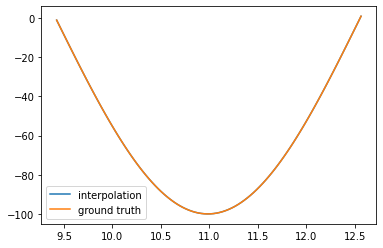

In [99]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Training Asynchronously 

In [33]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape))


In [197]:
hyper_param_bounds = np.array([[0.0001, 100], [ 0.0001, 100]])

In [35]:
async_obj = obj.train_async(hyper_param_bounds)

Async fvGP training started with  100  data points
fvGP submitted HGDL optimization for asynchronous training
bounds: [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
HGDL starts with:  [[ 10.          10.        ]
 [849.74516529 383.96733595]
 [321.11918758 415.84576811]]


## Updating asynchronously
Updates hyperparameters to current optimization values

In [38]:
obj.update_hyperparameters(async_obj)

fvGP async hyperparameter update successful
Latest hyperparameters:  [1000.            1.47191746]


array([1000.        ,    1.47191746])

## Killing training 


In [39]:
obj.kill_training(async_obj)

fvGP is killing asynchronous training....
HGDL kill initialized ...
HGDL kill successful
fvGP successfully killed the training.


## Looking the posterior mean at the test points

In [40]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

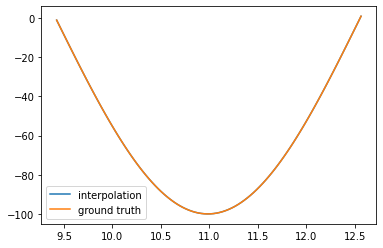

In [106]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Custom Kernels

In [49]:
def kernel_l1(x1,x2, hp, obj):
    ################################################################
    ###standard anisotropic kernel in an input space with l1########
    ################################################################
    d1 = abs(np.subtract.outer(x1[:,0],x2[:,0])) 
    return hp[0] * np.exp(-d1/hp[1])

In [50]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape),
                            gp_kernel_function = kernel_l1)

## Training our gaussian process regression on given data


In [51]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  100  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  47099.56438902898
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.1
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= 588.666
differential_evolution step 2: f(x)= 588.666
differential_evolution step 3: f(x)= 588.666
differential_evolution step 4: f(x)= 535.109
differential_evolution step 5: f(x)= 526.296
differential_evolution step 6: f(x)= 526.296
differential_evolution step 7: f(x)= 526.296
differential_evolution step 8: f(x)= 506.4
differential_evolution step 9: f(x)= 497.467
differential_evolution step 10: f(x)= 493.261
differential_evolution step 11: f(x)= 493.261
fvGP found hyperparameters  [1000.            1.47192176]  with likelihood  492.0289989061517  via global optimization


## Looking the posterior mean at the test points

In [52]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

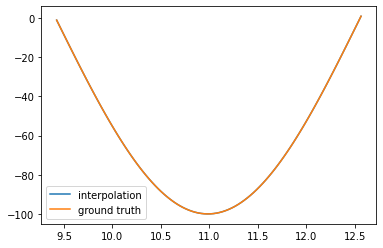

In [107]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Prior Mean Functions
### NOTE: The prior mean function must return a 1d vector, e.g., (100,)

In [69]:
def example_mean(gp_obj,x,hyperparameters):
    return np.sin(x[:,0]/0.001)

In [70]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape),
                            gp_mean_function = example_mean)

## Training our gaussian process regression on given data


In [71]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  100  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  47215.66878437307
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.1
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= 2005.7
differential_evolution step 2: f(x)= 1572.08
differential_evolution step 3: f(x)= 522.044
differential_evolution step 4: f(x)= 507.854
differential_evolution step 5: f(x)= 507.854
differential_evolution step 6: f(x)= 507.854
differential_evolution step 7: f(x)= 504.476
differential_evolution step 8: f(x)= 496.283
differential_evolution step 9: f(x)= 492.503
differential_evolution step 10: f(x)= 492.503
differential_evolution step 11: f(x)= 492.503
differential_evolution step 12: f(x)= 492.503
differential_evolution step 13: f(x)= 492.503
differential_evolution step 14:

## Looking the posterior mean at the test points

In [72]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

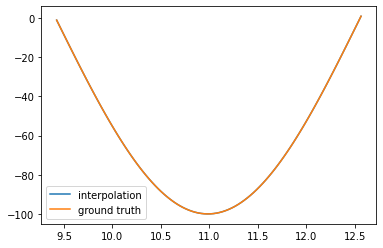

In [108]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Putting it altogether
All previous optional gaussian process components can be combined during the class instantiation

In [87]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]), 
                            variances = np.zeros(y_output.reshape(-1,1).shape), 
                            normalize_y = True,
                            gp_kernel_function = kernel_l1,
                            gp_mean_function = example_mean)

In [88]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  100  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  195.00941327717902
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.1
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= 172.692
differential_evolution step 2: f(x)= 172.624
fvGP found hyperparameters  [8.68855482e-01 1.00000000e-04]  with likelihood  134.8649235630018  via global optimization


In [89]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

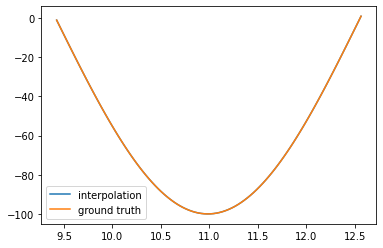

In [109]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# RANDOM TESTS

In [57]:
def hyperparams_test(obj):
    assert np.all(obj.hyperparameters >0) == True
hyperparams_test(obj)

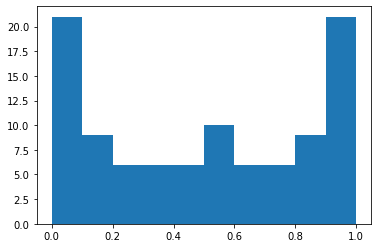

In [86]:
def normalize_y_test(obj):
    plt.hist(obj.data_y )
    plt.show()
    assert np.array_equal( obj.data_y <= 1, obj.data_y >= 0)
normalize_y_test(obj)

In [70]:
def correct_hyperparam_bounds_test(obj, hyperparam_bounds):
    assert len(obj.hyperparameters) == hyperparam_bounds.shape[0]
correct_hyperparam_bounds_test(obj, hyper_param_bounds)

In [76]:
def data_correct_shape_test(examples, dimensions, data):
    #Data here can be the inputs, associated outputs, or test positions
    assert data.shape[0] == examples
    assert data.shape[1] == dimensions
data_correct_shape_test(100, 1, np.array([y_output]).T) 